<a href="https://colab.research.google.com/github/Subhash-269/Subhash-269/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import numpy as np
import glob

#Loading Dataset

In [ ]:
cd /content/

/content


In [ ]:
!mkdir Brain_Tumor_detection

In [ ]:
os.chdir('/content/Brain_Tumor_detection')

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format
        (name = fn,length = len(uploaded[fn])))

Saving OD.v2-v2.voc.zip to OD.v2-v2.voc.zip
User uploaded file "OD.v2-v2.voc.zip" with length 3535567 bytes


In [ ]:
!unzip "/content/Brain_Tumor_detection/OD.v2-v2.voc.zip" -d "/content/Brain_Tumor_detection"

Archive:  /content/Brain_Tumor_detection/OD.v2-v2.voc.zip
 extracting: /content/Brain_Tumor_detection/README.dataset.txt  
 extracting: /content/Brain_Tumor_detection/README.roboflow.txt  
   creating: /content/Brain_Tumor_detection/test/
 extracting: /content/Brain_Tumor_detection/test/00018_101_jpg.rf.1dd2a7906775439da0ff17fe11cd0959.jpg  
 extracting: /content/Brain_Tumor_detection/test/00018_101_jpg.rf.1dd2a7906775439da0ff17fe11cd0959.xml  
 extracting: /content/Brain_Tumor_detection/test/00018_109_jpg.rf.b755db4d4ab45ccd167e3f0beb633c50.jpg  
 extracting: /content/Brain_Tumor_detection/test/00018_109_jpg.rf.b755db4d4ab45ccd167e3f0beb633c50.xml  
 extracting: /content/Brain_Tumor_detection/test/00018_111_jpg.rf.37f1da86cb607c0302e3cfbc565e4bac.jpg  
 extracting: /content/Brain_Tumor_detection/test/00018_111_jpg.rf.37f1da86cb607c0302e3cfbc565e4bac.xml  
 extracting: /content/Brain_Tumor_detection/test/00018_117_jpg.rf.200ce5cfc563fb4958bbc4346e58f7c4.jpg  
 extracting: /content/Brai

#Dataset Analysis

In [ ]:
train_dir = '/content/Brain_Tumor_detection/train'
test_dir  = '/content/Brain_Tumor_detection/test'
count = [len(os.listdir(train_dir)),len(os.listdir(test_dir))]
Class = ['train','test']

{'train': 592, 'test': 150}


<BarContainer object of 2 artists>

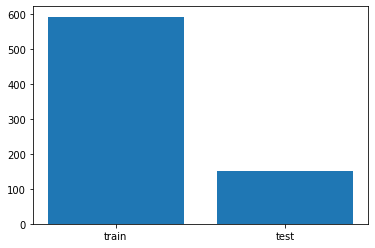

In [ ]:
Images = {
  "train": len(os.listdir(train_dir)),
  "test": len(os.listdir(test_dir)),
        }
print(Images)

keys = Images.keys()
values = Images.values()

plt.bar(keys, values)

#Data Visualisation

In [ ]:
train = os.listdir("/content/Brain_Tumor_detection/images/train")

In [ ]:
# these two variables are "the parameters" of this cell
w = 6
h = 6

# this function uses the open, resize and array functions we have seen before
load_img = lambda filename: np.array(PIL.Image.open(f"/content/Brain_Tumor_detection/images/train/{filename}").resize((200, 200)))

_, axes_list = plt.subplots(h, w, figsize=(2*w, 2*h)) # define a grid of (w, h)

for axes in axes_list:
    for ax in axes:
        ax.axis('off')
        img = np.random.choice(train_dir) # take a random train filename (like 000c34352.jpg)
        ax.imshow(load_img(img)) # load and show
        ax.set_title(img)

In [ ]:
images = [cv2.imread(file) for file in glob.glob("/content/Brain_Tumor_detection/images/train*.jpg")]
images

[]

In [ ]:
path = glob.glob("/content/Brain_Tumor_detection/images/train*.jpg")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)
cv2.imread(cv_img)

# Tensorflow Object Detection

##INSTALLATION

In [ ]:
cd /content/

/content


In [6]:
!pip install tensorflow-gpu

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.8.0 which is incompatible.
tensorflow-text 2.8.1 requires tensorflow<2.9,>=2.8.0, but you have tensorflow 2.7.0 which is incompatible.


In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
!git clone https://github.com/Subhash-269/models.git

Cloning into 'models'...
remote: Enumerating objects: 69341, done.
remote: Total 69341 (delta 0), reused 0 (delta 0), pack-reused 69341
Receiving objects: 100% (69341/69341), 577.33 MiB | 29.24 MiB/s, done.
Resolving deltas: 100% (48860/48860), done.


In [ ]:
cd '/content/models/research'


/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 22.57 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

#Install the Object Detection API

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.1 MB 8.6 MB/s 
     |████████████████████████████████| 352 kB 47.2 MB/s 
     |████████████████████████████████| 2.2 MB 39.1 MB/s 
     |████████████████████████████████| 23.4 MB 52.8 MB/s 
     |████████████████████████████████| 1.1 MB 35.3 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 90 kB 8.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.9 MB/s 
     |████████████████████████████████| 47.7 MB 1.5 MB/s 
     |████████████████████████████████| 234 kB 47

In [ ]:
#Testing installation
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-02-28 09:11:14.626589: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0228 09:11:15.042165 140071914043264 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.41s
I0228 09:11:15.379790 140071914043264 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.41s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.68s
I0228 09:11:16.060037 140071914043264 test

In [2]:
!pip install tensorflow==2.8.0

     |████████████████████████████████| 497.5 MB 24 kB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0


#Training Object Detection


###Preparing Dataset

In [ ]:
cd /content/Brain_Tumor_detection

/content/Brain_Tumor_detection


In [ ]:
!mkdir pretrained_model


In [ ]:
cd /content/Brain_Tumor_detection/pretrained_model

/content/Brain_Tumor_detection/pretrained_model


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

--2022-02-28 10:06:33--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.183.128, 2607:f8b0:4001:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.183.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M   279MB/s    in 0.2s    

2022-02-28 10:06:33 (279 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]



In [ ]:
!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200713/centernet_hg104_512x512_coco17_tpu-8.tar.gz

--2022-02-28 10:16:43--  http://download.tensorflow.org/models/object_detection/tf2/20200713/centernet_hg104_512x512_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.183.128, 2607:f8b0:4001:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.183.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426099846 (1.3G) [application/x-tar]
Saving to: ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’

centernet_hg104_512 100%[===================>]   1.33G   151MB/s    in 10s     

2022-02-28 10:16:53 (136 MB/s) - ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’ saved [1426099846/1426099846]



In [ ]:
!tar -xvf centernet_hg104_512x512_coco17_tpu-8.tar.gz

centernet_hg104_512x512_coco17_tpu-8/
centernet_hg104_512x512_coco17_tpu-8/checkpoint/
centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
centernet_hg104_512x512_coco17_tpu-8/checkpoint/checkpoint
centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.index
centernet_hg104_512x512_coco17_tpu-8/pipeline.config
centernet_hg104_512x512_coco17_tpu-8/saved_model/
centernet_hg104_512x512_coco17_tpu-8/saved_model/saved_model.pb
centernet_hg104_512x512_coco17_tpu-8/saved_model/assets/
centernet_hg104_512x512_coco17_tpu-8/saved_model/variables/
centernet_hg104_512x512_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
centernet_hg104_512x512_coco17_tpu-8/saved_model/variables/variables.index


##Create Tensorflow Record


In [ ]:
cd /content/Brain_Tumor_detection

/content/Brain_Tumor_detection


In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/Brain_Tumor_detection/train -l /content/Brain_Tumor_detection/annotations/label_map.pbtxt -o /content/Brain_Tumor_detection/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/Brain_Tumor_detection/test -l /content/Brain_Tumor_detection/annotations/label_map.pbtxt -o /content/Brain_Tumor_detection/annotations/test.record

# For example
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/train -l C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/train.record
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/test -l C:/Users/sglvladi/Documents/Tensorflow2/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/Brain_Tumor_detection/annotations/train.record
Successfully created the TFRecord file: /content/Brain_Tumor_detection/annotations/test.record


#Training the Model

In [3]:
cd /content/Brain_Tumor_detection

/content/Brain_Tumor_detection


In [ ]:
ls

annotations/                model_main_tf2.py  README.dataset.txt
exporter_main_v2.py         my_model/          README.roboflow.txt
export_tflite_graph_tf2.py  OD.v2-v2.voc.zip   test/
generate_tfrecord.py        pretrained_model/  train/


In [ ]:
!python -m pip install --upgrade opencv-contrib-python

In [4]:
!python model_main_tf2.py --model_dir=/content/Brain_Tumor_detection/my_model/centernet_hg104_512x512 --pipeline_config_path=/content/Brain_Tumor_detection/my_model/centernet_hg104_512x512/pipeline.config

2022-02-28 10:36:54.445367: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0228 10:36:54.455258 140141870339968 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0228 10:36:54.462278 140141870339968 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0228 10:36:54.462506 140141870339968 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0228 10:36:55.166095 140141870339968 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experiment

In [7]:
!python model_main_tf2.py --model_dir=/content/Brain_Tumor_detection/my_model/ssd_mobile_v2_320x320 --pipeline_config_path=/content/Brain_Tumor_detection/my_model/ssd_mobile_v2_320x320/pipeline.config

2022-02-28 11:15:23.121901: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0228 11:15:23.128402 140377414289280 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0228 11:15:23.133344 140377414289280 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0228 11:15:23.133514 140377414289280 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0228 11:15:23.189669 140377414289280 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experiment